**Notebook Creator:** Cameren Swiggum  
**Class:** Star Formation: From Molecular Clouds to Protostars (W2024)

---

##### Submit your solutions by uploading either the completed notebook with your solutions clearly visible or a PDF version of the notebook with all solutions displayed.

##### If you have issues, you can post them on the github repository's issues section (https://github.com/CSwigg/exercise_ysos/issues), or you can contact me at cameren.swiggum@univie.ac.at

---

# Introduction: Exploring YSOs in Orion A

In this exercise, you will analyze a catalog of stars located in the Orion A molecular cloud, observed at infrared wavelengths. This dataset provides key measurements such as fluxes, magnitudes, and extinction values, allowing us to explore the properties and evolutionary stages of young stellar objects (YSOs).

Your tasks include:
- Investigating the spectral energy distributions (SEDs) of selected stars.
- Classifying stars based on their spectral indices and evolutionary stages.
- Visualizing spatial distributions and extinction properties.
- Fitting models to the data to estimate physical parameters like temperature, radius, and disk properties.


---

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.io import fits
import astropy.units as u
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Data
Running the following cell will show you the row of stars with the available data measurments (columns). Fluxes for each filter are given as '{FILTER NAME}_flux'

In [10]:
stars_df = pd.read_csv('orionA_stars.csv')
print(len(stars_df))
print(stars_df.columns)

3117
Index(['name', 'ra', 'dec', 'l', 'b', 'alphaKW', 'alphaKW0', 'AKHerschel',
       'J_flux', 'J_flux_err', 'Jmag', 'H_flux', 'H_flux_err', 'Hmag',
       'Ks_flux', 'Ks_flux_err', 'Ksmag', 'W1_flux', 'W1_flux_err', 'W1mag',
       'W2_flux', 'W2_flux_err', 'W2mag', 'W3_flux', 'W3_flux_err', 'W3mag',
       'W4_flux', 'W4_flux_err', 'W4mag', 'J_flag', 'H_flag', 'Ks_flag',
       'W1_flag', 'W2_flag', 'W3_flag', 'W4_flag'],
      dtype='object')


In [11]:
filter_names = [
    'J', 'H', 'Ks',
    'W1', 'W2', 'W3', 'W4'
]
# Effective wavelengths (in microns) for each filter
wavelengths = np.array([
    1.235,  # 2MASS J band
    1.662,  # 2MASS H band
    2.159,  # 2MASS Ks band
    3.4,    # WISE W1
    4.6,    # WISE W2
    12.0,   # WISE W3
    22.0    # WISE W4
])

# Part 1

### Part 1 (a)
Given the formula for spectral the spectral index (alpha), calculate the spectral index for all stars using the K band magnitude and the W4 band magnitude.

### Part 1(b)

Select three stars and plot their spectral energy distributions (SEDs). For each star, report its previously computed spectral index and overlay a line on the SED to visualize the index. 

Ensure that both axes are log10-scaled to improve clarity and interpretation of the plots.

### Part 1(c)

The spectral index computed by Grossschedl et al. (2019) is available in the `df` DataFrame under the column `alphaKW0`. Create a scatter plot comparing the spectral index you computed to that from Grossschedl et al. (2019). Include a one-to-one line on the plot to identify potential systematic offsets.

You may observe a systematic offset between your values and those of Grossschedl et al. (2019). Discuss possible reasons for this discrepancy, such as differences in data processing or assumptions. To align your values with theirs, determine and apply a constant correction (add or subtract) so your data points align with the one-to-one line.

**Note:** Some stars lack `alphaKW0` measurements from Grossschedl et al. (2019), with their values set to `0`. Ignore these stars in the plot but retain them in the DataFrame for completeness.

### Part 1(d)

Using the modern spectral classification scheme discussed in the lecture and your computed, extinction-corrected spectral indices, classify the stars into their respective evolutionary stages. Add a new column, `class`, to the `df` DataFrame to store these classifications (e.g., `'Class 0/I'`, `'Flat'`, `'Class II'`, `'Class III'`, `'Main Sequence'`).

Create a bar chart to visualize the percentage representation of each evolutionary stage within the sample.

### Part 1(e)

Download the Lombardi et al. (2014) Orion A extinction map from the following link: [planck_herschel.fits.gz](https://cdsarc.cds.unistra.fr/ftp/J/A+A/566/A45/planck_herschel.fits.gz).

Using the provided code cell for plotting the extinction map, overlay the galactic coordinates `(l, b)` of the stars. Color-code the stars based on their classifications to distinguish between different evolutionary stages. If the plot becomes too crowded due to the number of sources, create separate plots for each stellar classification, with the extinction map as the background for all.

Comment on your findings. Are specific classes of stars predominantly located in regions you would expect based on their evolutionary stages and the surrounding environment?

In [12]:
# path to the FITS file
fits_path = '/Users/cam/Downloads/planck_herschel.fits' # NOTE: change this to the path of your FITS file

from astropy.wcs import WCS
hdu_orionA = fits.open(fits_path)
d = hdu_orionA[0].data[0]
h = hdu_orionA[0].header
wcs = WCS(h)

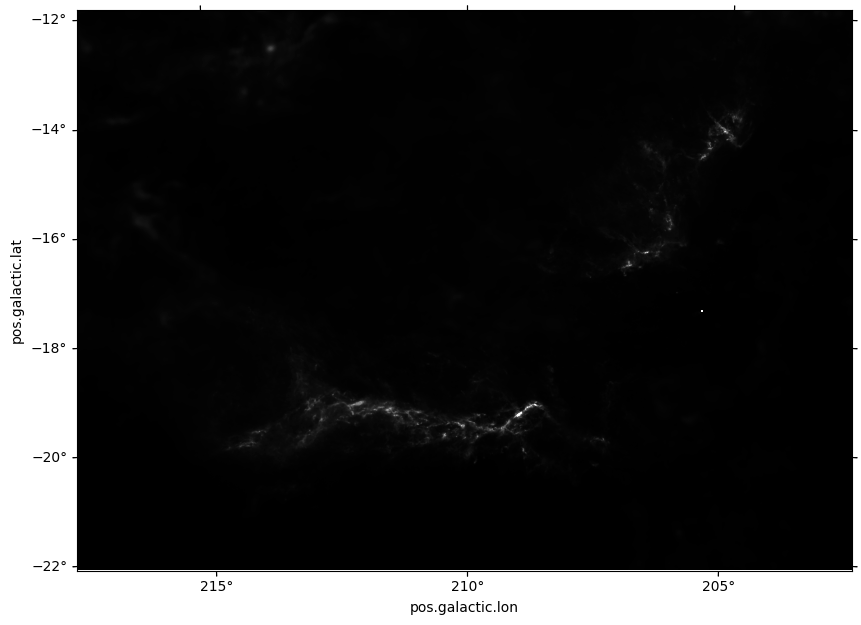

In [13]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection=wcs.celestial)
ax.imshow(d, origin='lower', cmap='Greys_r', vmin=0, vmax=0.005)

# Plot stars here

plt.show()

# Part 2

### Part 2(a)

Run the notebook `sed_fitting.ipynb` to perform spectral energy distribution (SED) fitting for the stars in your dataset. The results will be saved in the file `sed_fitter_results.csv`.

**Note:** The `sed_fitting.ipynb` notebook has been updated with more constrained stellar distances, significantly improving the runtime. You should now be able to fit all 3117 stars. However, if the process is still too time-consuming, you may limit the run to 1000 stars for faster execution.

In [14]:
# Read in results
sed_fitter_results = pd.read_csv('./sed_fitter_results.csv')
sed_fitter_results = sed_fitter_results.loc[:, ~sed_fitter_results.columns.str.contains('_min|_max')]
sed_fitter_results.columns = sed_fitter_results.columns.str.replace('_best', '')
print(sed_fitter_results.columns)

stars_df_fitted = pd.merge(stars_df, sed_fitter_results, left_on='name', right_on='source_name', how='inner') # NOTE: work with this dataframe from now on

Index(['source_name', 'n_data', 'n_fits', 'chi2', 'av', 'scale', 'star.radius',
       'star.temperature', 'disk.mass', 'disk.rmax', 'disk.beta', 'disk.p',
       'disk.h100', 'scattering', 'inclination'],
      dtype='object')


### Part 2(b)

Review the list of fitted parameters from the results. Identify and report which components of the stars and their environments we have attempted to estimate using the following reference: [Robitaille et al. (2017)](https://www.aanda.org/articles/aa/full_html/2017/04/aa25486-14/aa25486-14.html). Keep in mind that we are utilizing the `sp--s-i` models, which defines the scope of the parameters estimated. 

### Part 2(c)

Plot the spatial distribution of stars overlaid on the Planck-Herschel map of Orion A. Use color to represent their extinction values (`Av`) to highlight variations in extinction across the region.

Provide comments on your observations, noting any patterns or correlations between the stars' spatial distribution, their extinction values, and the background extinction map.

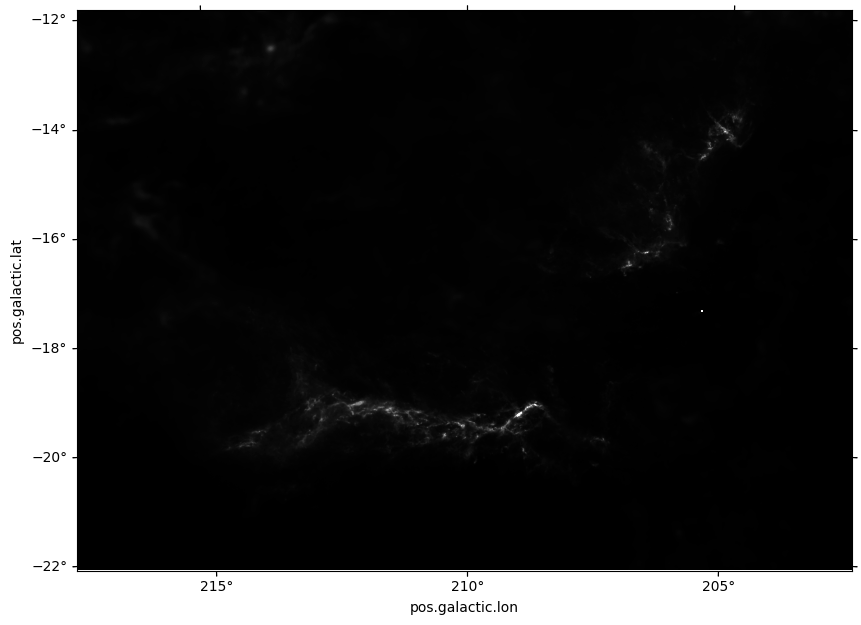

In [15]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection=wcs.celestial)
ax.imshow(d, origin='lower', cmap='Greys_r', vmin=0, vmax=0.005)

# Plot stars here

plt.show()

### Part 2(d)

Create bar charts to compare the YSO classifications (from Part 1) against the following parameters: `av`, `star.temperature`, `star.radius`, `disk.mass`, and `disk.radius`. For each class, indicate the average (median) value and the spread (standard deviation) of these parameters.

Comment on your observations and discuss whether they align with your expectations for YSOs at different evolutionary stages. Are the trends consistent with the theoretical understanding of how these parameters evolve across YSO classifications? Keep in mind that estimating physical parameters through SED fitting is a challenging task. The results may not accurately reflect the true masses, temperatures, or geometries of the stars due to model limitations, observational uncertainties, and degeneracies in the fitting process.

### Part 2(e)

What components might be missing from our models that could negatively impact the quality of our fits, and why? Discuss potential limitations and omissions in the models, referencing [Robitaille et al. (2017)](https://www.aanda.org/articles/aa/full_html/2017/04/aa25486-14/aa25486-14.html) for insights into how these factors may affect the accuracy of the results.